In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

In [80]:
world_ranking = pd.read_excel('fifa_ranking_2022-10-06.xlsx')
world_cups = pd.read_excel('world_cup.xlsx')
matches = pd.read_excel('matches_1930_2022.xlsx')

In [81]:
world_ranking.head()

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46


In [82]:
world_cups.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


In [83]:
matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


In [84]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   home_team                        964 non-null    object        
 1   away_team                        964 non-null    object        
 2   home_score                       964 non-null    int64         
 3   home_xg                          128 non-null    float64       
 4   home_penalty                     35 non-null     float64       
 5   away_score                       964 non-null    int64         
 6   away_xg                          128 non-null    float64       
 7   away_penalty                     35 non-null     float64       
 8   home_manager                     964 non-null    object        
 9   home_captain                     644 non-null    object        
 10  away_manager                     964 non-null    object       

In [85]:
matches['home_goal_long'][1]

"['7&rsquor;|1:0|Joško Gvardiol|Assist:|Ivan Perišić', '42&rsquor;|2:1|Mislav Oršić|Assist:|Marko Livaja']"

In [86]:
data = [world_cups, world_ranking, matches]
for d in data:
    print(d.shape)

(22, 9)
(211, 7)
(964, 44)


In [87]:
#checking for null values
for n in data:
    print(n.isnull().sum())
    print('=============================================')

Year             0
Host             0
Teams            0
Champion         0
Runner-Up        0
TopScorrer       0
Attendance       0
AttendanceAvg    0
Matches          0
dtype: int64
team               0
team_code          0
association        0
rank               0
previous_rank      0
points             0
previous_points    0
dtype: int64
home_team                            0
away_team                            0
home_score                           0
home_xg                            836
home_penalty                       929
away_score                           0
away_xg                            836
away_penalty                       929
home_manager                         0
home_captain                       320
away_manager                         0
away_captain                       320
Attendance                           0
Venue                                0
Officials                          255
Round                                0
Date                            

In [88]:
#checking for duplicates
for d in data:
    print(d.duplicated().sum())

0
0
0


In [89]:
matches['home_team'].unique()

array(['Argentina', 'Croatia', 'France', 'Morocco', 'England',
       'Netherlands', 'Portugal', 'Japan', 'Brazil', 'Korea Republic',
       'Ghana', 'Cameroon', 'Serbia', 'Canada', 'Costa Rica', 'Australia',
       'Tunisia', 'Saudi Arabia', 'Poland', 'Ecuador', 'IR Iran', 'Wales',
       'Belgium', 'Spain', 'Qatar', 'Switzerland', 'Uruguay', 'Germany',
       'Denmark', 'Mexico', 'Senegal', 'United States', 'Sweden',
       'Russia', 'Colombia', 'Panama', 'Iceland', 'Nigeria', 'Peru',
       'Egypt', 'Algeria', 'Bosnia and Herzegovina', 'Honduras', 'Italy',
       'Greece', "Côte d'Ivoire", 'Chile', 'Paraguay', 'Korea DPR',
       'Slovakia', 'Slovenia', 'South Africa', 'New Zealand', 'Ukraine',
       'Togo', 'Czech Republic', 'Serbia and Montenegro', 'Angola',
       'Trinidad and Tobago', 'Türkiye', 'China PR',
       'Republic of Ireland', 'Romania', 'Scotland', 'FR Yugoslavia',
       'Jamaica', 'Bulgaria', 'Bolivia', 'Norway', 'West Germany',
       'Yugoslavia', 'Czechoslovaki

In [90]:
matches['home_team'] = matches['home_team'].apply(lambda x: x.replace('Germany DR', 'West Germany'))
matches['away_team'] = matches['away_team'].apply(lambda x: x.replace('Germany DR', 'West Germany'))

## EDA 

### Basic EDA: Calculating the stats of the data

In [91]:
#total number of matches played till now
print('Total number of matches: ',len(matches))

Total number of matches:  964


In [92]:
# Total goals scored: summition of home goals + away goals (except penulty shoot out)
print('Total goals scored: ', sum(matches['home_score'] + matches['away_score']))

Total goals scored:  2720


In [93]:
#Average goals scored in a match
print('Average goals in a match: ', round(sum(matches['home_score'] + matches['away_score'])/len(matches),2))

Average goals in a match:  2.82


In [94]:
#Average attendance in a match
print('Average attendance in a match: ', int(sum(matches['Attendance'])/len(matches)))

Average attendance in a match:  45693


In [95]:
#Number of times, a perticular country is Winner, First runner-up and Second runner-up

#WINNER
winner = world_cups['Champion'].value_counts().reset_index()
print(winner)

#displaying using pie chart
fig = px.pie(winner, values='count',names='Champion',title='No of times a team won Fifa Worldcup')

#customize the pie chart output
fig.update_traces(textinfo='label+value')
fig.show()

       Champion  count
0        Brazil      5
1         Italy      4
2     Argentina      3
3        France      2
4       Germany      2
5  West Germany      2
6       Uruguay      2
7         Spain      1
8       England      1


In [96]:
#FIRST RUNNER UP & SECOND RUNNER UP
first_runnerup = world_cups['Runner-Up'].value_counts().reset_index()
print(first_runnerup)

fig = px.pie(first_runnerup, values='count', names='Runner-Up', title='No of times a team is 1st Runners up')

fig.update_traces(textinfo='value+label')
fig.show()

         Runner-Up  count
0        Argentina      3
1      Netherlands      3
2     West Germany      3
3           France      2
4           Brazil      2
5            Italy      2
6   Czechoslovakia      2
7          Hungary      2
8          Croatia      1
9          Germany      1
10          Sweden      1


In [97]:
matches['Round'].unique()


array(['Final', 'Third-place match', 'Semi-finals', 'Quarter-finals',
       'Round of 16', 'Group stage', 'Second group stage',
       'First group stage', 'Second round', 'First round',
       'Group stage play-off', 'Final stage'], dtype=object)

In [98]:
#Filling missing values of penuty

matches.fillna({'home_penalty': 0}, inplace=True)
matches.fillna({'away_penalty': 0}, inplace=True)

In [99]:
#total score by a team = goals + penulty
matches['a_total'] = matches['away_score'] + matches['away_penalty']
matches['h_total'] = matches['home_score'] + matches['home_penalty']

In [100]:
# Runner's up and third place team list columns filtering
Runner_up = matches[matches['Round'] == 'Final']
Third = matches[matches['Round'] == 'Third-place match']

In [101]:
#runner_up
def get_runner_up(row):
    if(row['h_total'] > row['a_total']):
        return row['away_team']
    else:
        return row['home_team']
    
#third place
def get_third(row):
    if(row['h_total'] > row['a_total']):
        return row['home_team']
    else:
        return row['away_team']

In [102]:
Runner_up['Runner_up'] = Runner_up.apply(get_runner_up, axis=1)
Third['Third_place'] = Third.apply(get_third, axis=1)

C:\Users\rajan\AppData\Local\Temp\ipykernel_16192\132527483.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rajan\AppData\Local\Temp\ipykernel_16192\132527483.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
Third

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,a_total,h_total,Third_place
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,1.0,2.0,Croatia
65,Belgium,England,2,1.5,0.0,0,1.0,0.0,Roberto Martínez,Eden Hazard,...,NaN,NaN,NaN,['90+3&rsquor;|2:0|Axel Witsel'],"['52&rsquor;|1:0|John Stones', '77&rsquor;|1:0...",['39&rsquor;|1:0|Thomas Vermaelen|for Nacer Ch...,['46&rsquor;|1:0|Jesse Lingard|for Danny Rose'...,0.0,2.0,Belgium
129,Brazil,Netherlands,0,NaN,0.0,3,NaN,0.0,Luiz Felipe Scolari,NaN,...,NaN,NaN,NaN,"['2&rsquor;|0:0|Thiago Silva', '54&rsquor;|0:2...","['9&rsquor;|0:1|Arjen Robben', '36&rsquor;|0:2...",['46&rsquor;|0:2|Fernandinho|for Luiz Gustavo'...,['70&rsquor;|0:2|Daryl Janmaat|for Daley Blind...,3.0,0.0,Netherlands
193,Uruguay,Germany,2,NaN,0.0,3,NaN,0.0,Óscar Tabárez,NaN,...,NaN,NaN,NaN,['61&rsquor;|2:2|Diego Pérez'],"['5&rsquor;|0:0|Dennis Aogo', '90+2&rsquor;|2:...",['77&rsquor;|2:2|Walter Gargano|for Diego Pére...,"['73&rsquor;|2:2|Stefan Kießling|for Cacau', '...",3.0,2.0,Germany
257,Germany,Portugal,3,NaN,0.0,1,NaN,0.0,Jürgen Klinsmann,NaN,...,NaN,NaN,NaN,"['7&rsquor;|0:0|Torsten Frings', '78&rsquor;|2...","['24&rsquor;|0:0|Ricardo Costa', '33&rsquor;|0...",['65&rsquor;|2:0|Oliver Neuville|for Miroslav ...,"['46&rsquor;|0:0|Petit|for Costinha', '69&rsqu...",1.0,3.0,Germany
321,Korea Republic,Türkiye,2,NaN,0.0,3,NaN,0.0,Guus Hiddink,NaN,...,NaN,NaN,NaN,['23&rsquor;|1:2|Lee Eul-yong'],"['50&rsquor;|1:3|Tugay Kerimoğlu', '83&rsquor;...",['46&rsquor;|1:3|Kim Tae-young|for Hong Myung-...,['41&rsquor;|1:3|Hakan Ünsal|for Emre Belözoğl...,3.0,2.0,Türkiye
385,Netherlands,Croatia,1,NaN,0.0,2,NaN,0.0,Guus Hiddink,NaN,...,NaN,NaN,NaN,"['89&rsquor;|1:2|Wim Jonk', '89&rsquor;|1:2|Ed...","['34&rsquor;|1:1|Krunoslav Jurčić', '52&rsquor...",['46&rsquor;|1:2|Marc Overmars|for Phillip Coc...,['79&rsquor;|1:2|Goran Vlaović|for Robert Pros...,2.0,1.0,Croatia
449,Sweden,Bulgaria,4,NaN,0.0,0,NaN,0.0,Tommy Svensson,Roland Nilsson,...,NaN,NaN,NaN,['82&rsquor;|4:0|Kennet Andersson'],['70&rsquor;|4:0|Zlatko Yankov'],['79&rsquor;|4:0|Anders Limpar|for Henrik Lars...,['42&rsquor;|4:0|Emil Kremenliev|for Trifon Iv...,0.0,4.0,Sweden
501,Italy,England,2,NaN,0.0,1,NaN,0.0,Azeglio Vicini,Giuseppe Bergomi,...,NaN,NaN,NaN,NaN,NaN,['67&rsquor;|0:0|Nicola Berti|for Luigi De Ago...,"['72&rsquor;|1:0|Neil Webb|for Steve McMahon',...",1.0,2.0,Italy
553,France,Belgium,4,NaN,0.0,2,NaN,0.0,Henri Michel,Patrick Battiston,...,NaN,NaN,NaN,NaN,['63&rsquor;|2:1|Jean-Marie Pfaff'],['55&rsquor;|2:1|Maxime Bossis|for Yvon Le Rou...,['46&rsquor;|2:1|Franky Van der Elst|for Miche...,2.0,4.0,France


In [104]:
Runner_up['Runner_up'].value_counts().index

Index(['Argentina', 'Netherlands', 'West Germany', 'France', 'Italy',
       'Czechoslovakia', 'Hungary', 'Croatia', 'Germany', 'Brazil', 'Sweden'],
      dtype='object', name='Runner_up')

In [105]:
trace1 = go.Bar(x = Runner_up['Runner_up'].value_counts().index, y = Runner_up['Runner_up'].value_counts(), name='First Runner-up') 
trace2 = go.Bar(x = Third['Third_place'].value_counts().index, y = Third['Third_place'].value_counts(), name='Second Runner-up')

In [106]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('First Runner-up', 'Second Runner-up'))
fig.append_trace(trace1,row=1,col=1)
fig.append_trace(trace2,row=1,col=2)

fig.show()

#### Conclusions

- Brazil won the most FIFA world cup titles(5) followed by Italy(4) and Argentina(3)
- Argentina, netherlands and West Germany won the most number of First Runners-up titles (3)
- Germany won Second Runners-up for most times(3)

In [107]:
# a year in which a perticular team participated
data = matches.groupby('Year').agg(home=('home_team', list), away=('away_team', list))
data

,home,away
Year,,
1930,"[Uruguay, Uruguay, Argentina, Argentina, Urugu...","[Argentina, Yugoslavia, United States, Chile, ..."
1934,"[Italy, Germany, Czechoslovakia, Italy, Italy,...","[Czechoslovakia, Austria, Germany, Austria, Sp..."
1938,"[Brazil, Italy, Hungary, Italy, Brazil, Sweden...","[Sweden, Hungary, Sweden, Brazil, Czechoslovak..."
1950,"[Sweden, Uruguay, Brazil, Uruguay, Brazil, Uru...","[Spain, Brazil, Spain, Sweden, Sweden, Spain, ..."
1954,"[Germany, Austria, Hungary, Germany, Germany, ...","[Hungary, Uruguay, Uruguay, Austria, Yugoslavi..."
1958,"[Brazil, France, Sweden, Brazil, France, West ...","[Sweden, West Germany, West Germany, France, N..."
1962,"[Brazil, Chile, Brazil, Czechoslovakia, Chile,...","[Czechoslovakia, Yugoslavia, Chile, Yugoslavia..."
1966,"[England, Portugal, England, West Germany, Por...","[West Germany, Soviet Union, Portugal, Soviet ..."
1970,"[Brazil, West Germany, Italy, Brazil, Brazil, ...","[Italy, Uruguay, West Germany, Uruguay, Peru, ..."


In [108]:
#1) concatinating the data of two list: Home and Away
#2) putting it in a set because set doesn't contain duplicates
#3) Framing a list of that set
data['teams'] = data.apply(lambda x: list(set(x['home']+x['away'])), axis=1)

#4) number of teams in a specific edition of a FIFA
data['No_of_teams'] = data['teams'].apply(len)

data

,home,away,teams,No_of_teams
Year,,,,
1930,"[Uruguay, Uruguay, Argentina, Argentina, Urugu...","[Argentina, Yugoslavia, United States, Chile, ...","[Romania, France, Paraguay, Bolivia, Peru, Mex...",13
1934,"[Italy, Germany, Czechoslovakia, Italy, Italy,...","[Czechoslovakia, Austria, Germany, Austria, Sp...","[Romania, France, Italy, Czechoslovakia, Switz...",16
1938,"[Brazil, Italy, Hungary, Italy, Brazil, Sweden...","[Sweden, Hungary, Sweden, Brazil, Czechoslovak...","[Romania, France, Italy, Czechoslovakia, Switz...",15
1950,"[Sweden, Uruguay, Brazil, Uruguay, Brazil, Uru...","[Spain, Brazil, Spain, Sweden, Sweden, Spain, ...","[Italy, Switzerland, Sweden, Paraguay, Bolivia...",13
1954,"[Germany, Austria, Hungary, Germany, Germany, ...","[Hungary, Uruguay, Uruguay, Austria, Yugoslavi...","[Scotland, France, Italy, Czechoslovakia, Swit...",16
1958,"[Brazil, France, Sweden, Brazil, France, West ...","[Sweden, West Germany, West Germany, France, N...","[Scotland, France, Wales, Czechoslovakia, Swed...",16
1962,"[Brazil, Chile, Brazil, Czechoslovakia, Chile,...","[Czechoslovakia, Yugoslavia, Chile, Yugoslavia...","[Italy, Czechoslovakia, Switzerland, Soviet Un...",16
1966,"[England, Portugal, England, West Germany, Por...","[West Germany, Soviet Union, Portugal, Soviet ...","[France, Italy, Portugal, Switzerland, Soviet ...",16
1970,"[Brazil, West Germany, Italy, Brazil, Brazil, ...","[Italy, Uruguay, West Germany, Uruguay, Peru, ...","[Romania, Italy, Czechoslovakia, Sweden, Belgi...",16


In [109]:
# for visualization, I need all the data of a single list in different rows
data_pivot = data['teams'].explode().reset_index().pivot(index='teams', columns='Year', values='Year')

In [110]:
data_pivot.fillna(0,inplace=True)
data_pivot

Year,1930,1934,1938,1950,1954,1958,1962,1966,1970,1974,...,1986,1990,1994,1998,2002,2006,2010,2014,2018,2022
teams,,,,,,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1986.0,0.0,0.0,0.0,0.0,0.0,2010.0,2014.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2006.0,0.0,0.0,0.0,0.0
Argentina,1930.0,1934.0,0.0,0.0,0.0,1958.0,1962.0,1966.0,0.0,1974.0,...,1986.0,1990.0,1994.0,1998.0,2002.0,2006.0,2010.0,2014.0,2018.0,2022.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1974.0,...,0.0,0.0,0.0,0.0,0.0,2006.0,2010.0,2014.0,2018.0,2022.0
Austria,0.0,1934.0,0.0,0.0,1954.0,1958.0,0.0,0.0,0.0,0.0,...,0.0,1990.0,0.0,1998.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,1930.0,0.0,0.0,1950.0,1954.0,0.0,1962.0,1966.0,1970.0,1974.0,...,1986.0,1990.0,0.0,0.0,2002.0,0.0,2010.0,2014.0,2018.0,2022.0
Wales,0.0,0.0,0.0,0.0,0.0,1958.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022.0
West Germany,0.0,0.0,0.0,0.0,0.0,1958.0,1962.0,1966.0,1970.0,1974.0,...,1986.0,1990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
data_pivot = data_pivot.map(lambda x: 1 if x>0 else 0)

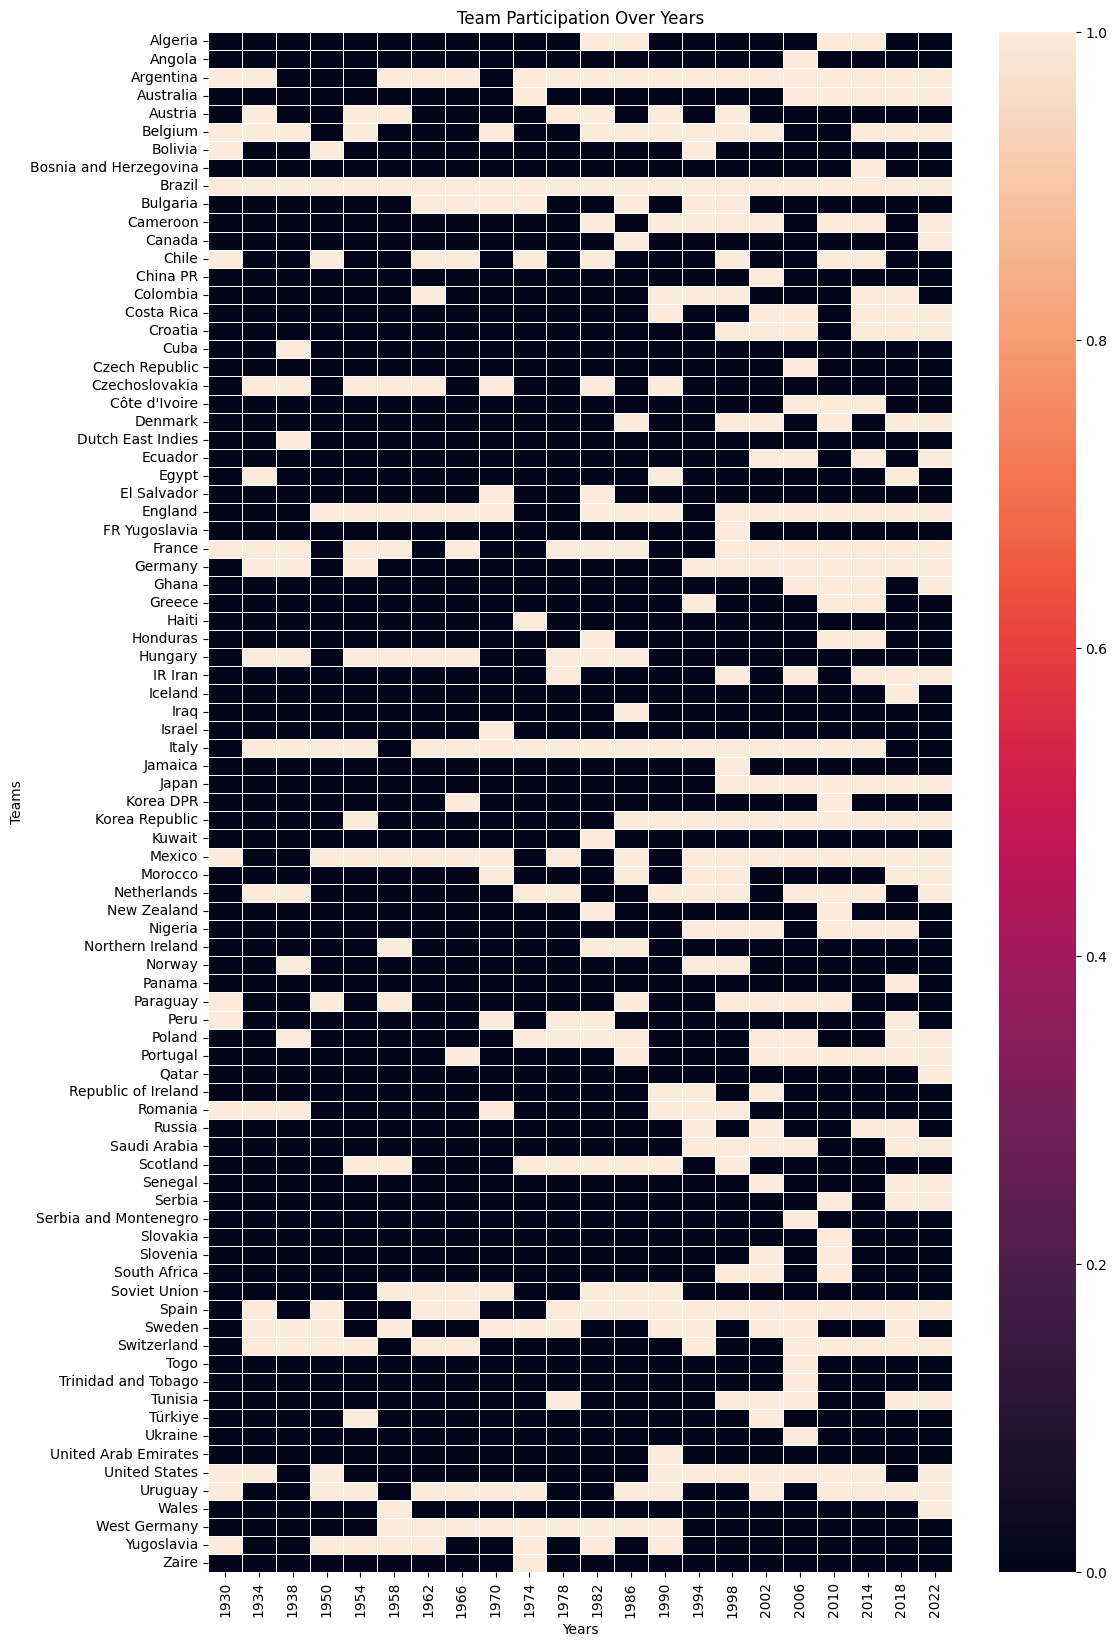

In [112]:
plt.figure(figsize=(12,20))
sns.heatmap(data_pivot, linewidths=0.5,linecolor='white')
plt.title('Team Participation Over Years')
plt.xlabel('Years')
plt.ylabel('Teams')
plt.show()

#### Observations

1) Brazil is the only country to play all the edition of FIFA worldcup
2) Countries like Quatar, Canada, Wales are new to the tournament
3) Cuba, Israel, Kuwait, Jamaica, Ukrain, Tango - These countries played only one edition of FIFA World-cup

In [113]:
#Checking for world ranking of a team
Same_rank = world_ranking[world_ranking['rank'] == world_ranking['previous_rank']]['team'].tolist()
Decreased_rank = world_ranking[world_ranking['rank']>world_ranking['previous_rank']]['team'].tolist()
Increased_rank = world_ranking[world_ranking['rank']<world_ranking['previous_rank']]['team'].tolist()

In [114]:
print(len(Same_rank))
print(len(Decreased_rank))
print(len(Increased_rank))

66
68
77


In [115]:
max_len = max(len(Same_rank), len(Decreased_rank), len(Increased_rank))

In [116]:
#length of each list should be equal to represent the data in dataframe
Same_rank+=[None]*(max_len - len(Same_rank))
Decreased_rank+=[None]*(max_len - len(Decreased_rank))
Increased_rank+=[None]*(max_len - len(Increased_rank))

In [117]:
#making the dataframe
df = pd.DataFrame({
    'Same Rank': Same_rank,
    'Increased Rank': Increased_rank,
    'Decreased Rank': Decreased_rank
})
df

,Same Rank,Increased Rank,Decreased Rank
0,Brazil,Italy,Spain
1,Belgium,Croatia,Mexico
2,Argentina,Switzerland,Uruguay
3,France,IR Iran,USA
4,England,Serbia,Peru
...,...,...,...
72,None,Timor-Leste,None
73,None,Eritrea,None
74,None,Aruba,None
75,None,Bahamas,None


In [118]:
df.isnull().sum()

Same Rank         11
Increased Rank     0
Decreased Rank     9
dtype: int64

In [119]:
df.fillna('', inplace=True)
df

,Same Rank,Increased Rank,Decreased Rank
0,Brazil,Italy,Spain
1,Belgium,Croatia,Mexico
2,Argentina,Switzerland,Uruguay
3,France,IR Iran,USA
4,England,Serbia,Peru
...,...,...,...
72,,Timor-Leste,
73,,Eritrea,
74,,Aruba,
75,,Bahamas,


In [120]:
#function to check which country belongs to which column
def find_rank(Country):
    res = []
    for column in df.columns:
        matches = Country == df[column]
        if matches.any():
            res.append(column)
    return res

find_rank('Qatar')

['Decreased Rank']

# ADVANCED EDA

In [121]:
matches

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,a_total,h_total
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,5.0,7.0
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,1.0,2.0
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,0.0,2.0
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",0.0,3.0
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,0.0,0,NaN,0.0,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
960,Yugoslavia,Brazil,2,NaN,0.0,1,NaN,0.0,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
961,Romania,Peru,3,NaN,0.0,1,NaN,0.0,Octav Luchide,Emerich Vogl,...,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0
962,United States,Belgium,3,NaN,0.0,0,NaN,0.0,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0


In [122]:
#probability of a team winning KNOCKOUT matches(Final, Semi-final, Quarter-final)
country = 'Argentina' 
data = matches[((matches['home_team']==country) | (matches['away_team']==country))&
        ((matches['Round']=='Final') | (matches['Round']=='Semi-finals') | (matches['Round']=='Quarter-finals'))]
data

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,a_total,h_total
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,5.0,7.0
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",0.0,3.0
7,Netherlands,Argentina,2,0.6,3.0,2,1.9,4.0,Louis van Gaal,Virgil van Dijk,...,NaN,NaN,Denzel Dumfries · 120+3,NaN,"['43&rsquor;|0:1|Jurriën Timber', '45+2&rsquor...","['31&rsquor;|0:0|Walter Samuel', '43&rsquor;|0...",['46&rsquor;|0:1|Steven Berghuis|for Steven Be...,['66&rsquor;|0:1|Leandro Paredes|for Rodrigo D...,6.0,5.0
128,Germany,Argentina,1,NaN,0.0,0,NaN,0.0,Joachim Löw,NaN,...,NaN,NaN,NaN,NaN,"['29&rsquor;|0:0|Bastian Schweinsteiger', '34&...","['64&rsquor;|0:0|Javier Mascherano', '65&rsquo...",['32&rsquor;|0:0|André Schürrle|for Christoph ...,['46&rsquor;|0:0|Sergio Agüero|for Ezequiel La...,0.0,1.0
130,Netherlands,Argentina,0,NaN,2.0,0,NaN,4.0,Louis van Gaal,NaN,...,NaN,NaN,NaN,NaN,"['45&rsquor;|0:0|Bruno Martins Indi', '105&rsq...",['49&rsquor;|0:0|Martín Demichelis'],['46&rsquor;|0:0|Daryl Janmaat|for Bruno Marti...,['81&rsquor;|0:0|Rodrigo Palacio|for Enzo Pére...,4.0,2.0
132,Argentina,Belgium,1,NaN,0.0,0,NaN,0.0,Alejandro Sabella,NaN,...,NaN,NaN,NaN,NaN,['75&rsquor;|1:0|Lucas Biglia'],"['53&rsquor;|1:0|Eden Hazard', '69&rsquor;|1:0...",['38&rsquor;|1:0|Enzo Pérez|for Ángel Di María...,['59&rsquor;|1:0|Romelu Lukaku|for Divock Orig...,0.0,1.0
196,Argentina,Germany,0,NaN,0.0,4,NaN,0.0,Diego Maradona,NaN,...,NaN,NaN,NaN,NaN,"['11&rsquor;|0:1|Nicolás Otamendi', '80&rsquor...",['35&rsquor;|0:1|Thomas Müller'],['70&rsquor;|0:2|Javier Pastore|for Nicolás Ot...,['72&rsquor;|0:2|Marcell Jansen|for Jérôme Boa...,4.0,0.0
262,Germany,Argentina,1,NaN,4.0,1,NaN,2.0,Jürgen Klinsmann,NaN,...,NaN,NaN,NaN,NaN,"['3&rsquor;|0:0|Lukas Podolski', '90+4&rsquor;...","['46&rsquor;|0:0|Juan Pablo Sorín', '60&rsquor...",['62&rsquor;|0:1|David Odonkor|for Bernd Schne...,['71&rsquor;|0:1|Leo Franco|for Pato Abbondanz...,3.0,5.0
388,Netherlands,Argentina,2,NaN,0.0,1,NaN,0.0,Guus Hiddink,NaN,...,NaN,NaN,Arthur Numan · 76,Ariel Ortega · 87,"['10&rsquor;|0:0|Jaap Stam', '17&rsquor;|1:0|A...","['22&rsquor;|1:1|José Chamot', '60&rsquor;|1:1...",['64&rsquor;|1:1|Marc Overmars|for Ronald de B...,['68&rsquor;|1:1|Mauricio Pineda|for Matías Al...,1.0,2.0
500,West Germany,Argentina,1,NaN,0.0,0,NaN,0.0,Franz Beckenbauer,Lothar Matthäus,...,NaN,Pedro Monzón · 65|Gustavo Dezotti · 87,NaN,NaN,['52&rsquor;|0:0|Rudi Völler'],"['5&rsquor;|0:0|Gustavo Dezotti', '84&rsquor;|...",['73&rsquor;|0:0|Stefan Reuter|for Thomas Bert...,['46&rsquor;|0:0|Pedro Monzón|for Oscar Rugger...,0.0,1.0


In [123]:
matches['Round'].unique()

array(['Final', 'Third-place match', 'Semi-finals', 'Quarter-finals',
       'Round of 16', 'Group stage', 'Second group stage',
       'First group stage', 'Second round', 'First round',
       'Group stage play-off', 'Final stage'], dtype=object)

In [124]:
data

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,a_total,h_total
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,5.0,7.0
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",0.0,3.0
7,Netherlands,Argentina,2,0.6,3.0,2,1.9,4.0,Louis van Gaal,Virgil van Dijk,...,NaN,NaN,Denzel Dumfries · 120+3,NaN,"['43&rsquor;|0:1|Jurriën Timber', '45+2&rsquor...","['31&rsquor;|0:0|Walter Samuel', '43&rsquor;|0...",['46&rsquor;|0:1|Steven Berghuis|for Steven Be...,['66&rsquor;|0:1|Leandro Paredes|for Rodrigo D...,6.0,5.0
128,Germany,Argentina,1,NaN,0.0,0,NaN,0.0,Joachim Löw,NaN,...,NaN,NaN,NaN,NaN,"['29&rsquor;|0:0|Bastian Schweinsteiger', '34&...","['64&rsquor;|0:0|Javier Mascherano', '65&rsquo...",['32&rsquor;|0:0|André Schürrle|for Christoph ...,['46&rsquor;|0:0|Sergio Agüero|for Ezequiel La...,0.0,1.0
130,Netherlands,Argentina,0,NaN,2.0,0,NaN,4.0,Louis van Gaal,NaN,...,NaN,NaN,NaN,NaN,"['45&rsquor;|0:0|Bruno Martins Indi', '105&rsq...",['49&rsquor;|0:0|Martín Demichelis'],['46&rsquor;|0:0|Daryl Janmaat|for Bruno Marti...,['81&rsquor;|0:0|Rodrigo Palacio|for Enzo Pére...,4.0,2.0
132,Argentina,Belgium,1,NaN,0.0,0,NaN,0.0,Alejandro Sabella,NaN,...,NaN,NaN,NaN,NaN,['75&rsquor;|1:0|Lucas Biglia'],"['53&rsquor;|1:0|Eden Hazard', '69&rsquor;|1:0...",['38&rsquor;|1:0|Enzo Pérez|for Ángel Di María...,['59&rsquor;|1:0|Romelu Lukaku|for Divock Orig...,0.0,1.0
196,Argentina,Germany,0,NaN,0.0,4,NaN,0.0,Diego Maradona,NaN,...,NaN,NaN,NaN,NaN,"['11&rsquor;|0:1|Nicolás Otamendi', '80&rsquor...",['35&rsquor;|0:1|Thomas Müller'],['70&rsquor;|0:2|Javier Pastore|for Nicolás Ot...,['72&rsquor;|0:2|Marcell Jansen|for Jérôme Boa...,4.0,0.0
262,Germany,Argentina,1,NaN,4.0,1,NaN,2.0,Jürgen Klinsmann,NaN,...,NaN,NaN,NaN,NaN,"['3&rsquor;|0:0|Lukas Podolski', '90+4&rsquor;...","['46&rsquor;|0:0|Juan Pablo Sorín', '60&rsquor...",['62&rsquor;|0:1|David Odonkor|for Bernd Schne...,['71&rsquor;|0:1|Leo Franco|for Pato Abbondanz...,3.0,5.0
388,Netherlands,Argentina,2,NaN,0.0,1,NaN,0.0,Guus Hiddink,NaN,...,NaN,NaN,Arthur Numan · 76,Ariel Ortega · 87,"['10&rsquor;|0:0|Jaap Stam', '17&rsquor;|1:0|A...","['22&rsquor;|1:1|José Chamot', '60&rsquor;|1:1...",['64&rsquor;|1:1|Marc Overmars|for Ronald de B...,['68&rsquor;|1:1|Mauricio Pineda|for Matías Al...,1.0,2.0
500,West Germany,Argentina,1,NaN,0.0,0,NaN,0.0,Franz Beckenbauer,Lothar Matthäus,...,NaN,Pedro Monzón · 65|Gustavo Dezotti · 87,NaN,NaN,['52&rsquor;|0:0|Rudi Völler'],"['5&rsquor;|0:0|Gustavo Dezotti', '84&rsquor;|...",['73&rsquor;|0:0|Stefan Reuter|for Thomas Bert...,['46&rsquor;|0:0|Pedro Monzón|for Oscar Rugger...,0.0,1.0


In [125]:
df1 = data['Round'].value_counts().reset_index()
df1.columns=['Round', 'Total Matches']
df1

,Round,Total Matches
0,Quarter-finals,8
1,Final,6
2,Semi-finals,5


In [126]:
#Function to determine the winner of each game
def get_winner(row):
    if(row['a_total']> row['h_total']):
        return row['away_team']
    else:
        return row['home_team']

In [127]:
data['Winner'] = data.apply(get_winner, axis=1)

C:\Users\rajan\AppData\Local\Temp\ipykernel_16192\3918663080.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
df2 = data[data['Winner']==country]['Round'].value_counts().reset_index()
df2.columns = ['Round', 'Matches Won']

In [129]:
res = pd.merge(df1,df2,on='Round', how='inner')
res

,Round,Total Matches,Matches Won
0,Quarter-finals,8,4
1,Final,6,3
2,Semi-finals,5,5


##### Here, there is a redundancy in the data, as for team Argentina, the number of Semi-Final played is 5 but the number of Final is 6 which is not possible. So, the probability can be wrong because of the data.

In [130]:
res['Percentage'] = (res['Matches Won'] / res['Total Matches'])*100
res

,Round,Total Matches,Matches Won,Percentage
0,Quarter-finals,8,4,50.0
1,Final,6,3,50.0
2,Semi-finals,5,5,100.0


In [131]:
def calculate_performance(country):
    #filtering matches based on the specified country and rounds
    data = matches[((matches['home_team'] == country) | (matches['away_team'] == country)) &
                   ((matches['Round'] == 'Final') | (matches['Round'] == 'Semi-finals') | (matches['Round'] == 'Quarter-finals'))]

    #creating a DataFrame with the count of matches per round
    df1 = pd.DataFrame(data['Round'].value_counts().reset_index())
    df1.columns = ['Round', 'Total Matches']

    # Function to determine the winner of each match
    def get_winner(row):
        if row['h_total'] > row['a_total']:
            return row['home_team']
        else:
            return row['away_team']

    #using the function to determine the winner for each match
    data['Winner'] = data.apply(get_winner, axis=1)

    #creating a DataFrame with the count of matches won by the specified country per round
    df2 = pd.DataFrame(data[data['Winner'] == country]['Round'].value_counts().reset_index())
    df2.columns = ['Round', 'Matches Won']

    #merge the two DataFrames on the 'Round' column
    result = pd.merge(df1, df2, on='Round', how='inner')

    #the percentage of matches won
    result['Percentage'] = (result['Matches Won'] / result['Total Matches']) * 100

    return result

In [132]:
calculate_performance('Sweden')

C:\Users\rajan\AppData\Local\Temp\ipykernel_16192\153469898.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Round,Total Matches,Matches Won,Percentage
0,Quarter-finals,5,3,60.000000
1,Semi-finals,3,1,33.333333


#### Conclusions

1) Italy: Teams facing Italy in knockout rounds can expect a challenging match. Italy has a 75% probability of winning in the quarter-finals, an 86% probability of advancing from the semi-finals, and a 67% probability of securing victory in the finals.

2) Spain - if it clears QF its wins title.

3) France - they have good record in QF comparatively not that good record in Semi and Finals.

4) Sweden never reaches a final.

5) If Argentina reaches semi final , it will surely win it.

In [133]:
# playing strategy of a team in knockout vs non-knockout matches
matches['home_goal']

0                 Ángel Di María · 36|Lionel Messi · 108
1                   Joško Gvardiol · 7|Mislav Oršić · 42
2              Theo Hernández · 5|Randal Kolo Muani · 79
3                Julián Álvarez · 39|Julián Álvarez · 69
4                                 Youssef En-Nesyri · 42
                             ...                        
959                                      Luis Monti · 81
960               Aleksandar Tirnanić · 21|Ivan Bek · 30
961    Adalbert Deșu · 1|Constantin Stanciu · 79|Nico...
962    Bart McGhee · 23|Tom Florie · 45|Bert Patenaud...
963    Lucien Laurent · 19|Marcel Langiller · 40|Andr...
Name: home_goal, Length: 964, dtype: object

In [134]:
#the pattern of the string using ChatGPT
pattern = r'\b(\d+)\b'

In [135]:
#function to extract the time from each row of Home team
def get_time_home(row):
    if pd.notna(row['home_goal']):
        goal_str = str(row['home_goal'])
        times=[]
        matches = re.findall(pattern,goal_str)
        times.extend(matches)
        return ', '.join(times)
    else:
        return ''

In [136]:
#function to extract the time from each row of Away team
def get_time_away(row):
    if pd.notna(row['away_goal']):
        goal_str = str(row['away_goal'])
        times=[]
        matches = re.findall(pattern,goal_str)
        times.extend(matches)
        return ', '.join(times)
    else:
        return ''

In [137]:
matches['Home_Goals'] = matches.apply(get_time_home, axis=1)
matches['Away_Goals'] = matches.apply(get_time_away, axis=1)
matches

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,a_total,h_total,Home_Goals,Away_Goals
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,5.0,7.0,"36, 108",81
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,1.0,2.0,"7, 42",9
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,0.0,2.0,"5, 79",
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",0.0,3.0,"39, 69",
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,0.0,1.0,42,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,0.0,0,NaN,0.0,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,81,
960,Yugoslavia,Brazil,2,NaN,0.0,1,NaN,0.0,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,"21, 30",62
961,Romania,Peru,3,NaN,0.0,1,NaN,0.0,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,"1, 79, 89",75
962,United States,Belgium,3,NaN,0.0,0,NaN,0.0,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,"23, 45, 69",


In [138]:
#checking whether the match is knockout or not
knockout_round = ['Final', 'Semi-finals', 'Quarter-finals']

matches['Knockout'] = matches['Round'].apply(lambda x : 'Knockout' if x in knockout_round else 'Non-Knockout')
matches

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,a_total,h_total,Home_Goals,Away_Goals,Knockout
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,5.0,7.0,"36, 108",81,Knockout
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,1.0,2.0,"7, 42",9,Non-Knockout
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,0.0,2.0,"5, 79",,Knockout
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",0.0,3.0,"39, 69",,Knockout
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,0.0,1.0,42,,Knockout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,0.0,0,NaN,0.0,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,81,,Non-Knockout
960,Yugoslavia,Brazil,2,NaN,0.0,1,NaN,0.0,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,"21, 30",62,Non-Knockout
961,Romania,Peru,3,NaN,0.0,1,NaN,0.0,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,NaN,NaN,1.0,3.0,"1, 79, 89",75,Non-Knockout
962,United States,Belgium,3,NaN,0.0,0,NaN,0.0,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,0.0,3.0,"23, 45, 69",,Non-Knockout


In [139]:
#for Argentina
home_k = matches[(matches['home_team'] == country) & (matches['Knockout'] == 'Knockout')]
away_k = matches[(matches['away_team'] == country) & (matches['Knockout'] == 'Knockout')]

home_nk = matches[(matches['home_team'] == country) & (matches['Knockout'] == 'Non-Knockout')]
away_nk = matches[(matches['away_team'] == country) & (matches['Knockout'] == 'Non-Knockout')]

In [140]:
a = home_k['Home_Goals'].str.split(', ').explode().reset_index()
b = away_k['Away_Goals'].str.split(', ').explode().reset_index()
print(a)
print('====================')
print(b)

    index Home_Goals
0       0         36
1       0        108
2       3         39
3       3         69
4     132          8
5     196           
6     552         23
7     552         56
8     552         84
9     555         51
10    555         63
11    556         51
12    556         55
13    656         38
14    656        105
15    656        115
16    948         20
17    948         56
18    948         69
19    948         80
20    948         85
21    948         87
    index Away_Goals
0       7         35
1     128           
2     130           
3     262         49
4     388         17
5     500           
6     503         67
7     506           
8     769           
9     946         20
10    946         37


#### For Knockout matches of Argentina

In [141]:
df3 = pd.concat([a,b],axis=0, ignore_index=True)
df3

,index,Home_Goals,Away_Goals
0,0,36,NaN
1,0,108,NaN
2,3,39,NaN
3,3,69,NaN
4,132,8,NaN
5,196,,NaN
6,552,23,NaN
7,552,56,NaN
8,552,84,NaN
9,555,51,NaN


In [142]:
#replacing empty values with 0
df3.replace(r'^\s*$', 0, regex=True, inplace=True)
df3.fillna(0,inplace=True)
df3

,index,Home_Goals,Away_Goals
0,0,36,0
1,0,108,0
2,3,39,0
3,3,69,0
4,132,8,0
5,196,0,0
6,552,23,0
7,552,56,0
8,552,84,0
9,555,51,0


In [143]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       33 non-null     int64 
 1   Home_Goals  33 non-null     object
 2   Away_Goals  33 non-null     object
dtypes: int64(1), object(2)
memory usage: 920.0+ bytes


In [144]:
#here, team argentina in some matches, might be home team otherwise away team. So, I added two columns to just focus on time
#firstly converting the datatype of Goals column
df3['Home_Goals'] = df3['Home_Goals'].astype(int)
df3['Away_Goals'] = df3['Away_Goals'].astype(int)
df3.info()
df3['Time'] = df3['Away_Goals'] + df3['Home_Goals']
df3 = df3[df3['Time']!=0]
df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   index       33 non-null     int64
 1   Home_Goals  33 non-null     int32
 2   Away_Goals  33 non-null     int32
dtypes: int32(2), int64(1)
memory usage: 656.0 bytes


,index,Home_Goals,Away_Goals,Time
0,0,36,0,36
1,0,108,0,108
2,3,39,0,39
3,3,69,0,69
4,132,8,0,8
6,552,23,0,23
7,552,56,0,56
8,552,84,0,84
9,555,51,0,51
10,555,63,0,63


In [145]:
def determine_performance(row):
    if(row['Time']<=45):
        return 'First Half'
    elif(row['Time']>45 and row['Time']<=90):
        return 'Second Half'
    else:
        return 'Extra Time'
    
df3['Time of Goal'] = df3.apply(determine_performance, axis=1)
df3['Time of Goal'].value_counts()/len(df3)*100

C:\Users\rajan\AppData\Local\Temp\ipykernel_16192\3862772633.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Time of Goal
Second Half    51.851852
First Half     37.037037
Extra Time     11.111111
Name: count, dtype: float64

#### For Non-Knockout matches of Argentina

In [146]:
c = home_nk['Home_Goals'].str.split(', ').explode().reset_index()
d = home_nk['Away_Goals'].str.split(', ').explode().reset_index()

df4 = pd.concat([c,d], axis=0, ignore_index=True)
df4

,index,Home_Goals,Away_Goals
0,15,35,NaN
1,15,57,NaN
2,43,64,NaN
3,43,87,NaN
4,56,,NaN
...,...,...,...
153,862,NaN,79
154,949,NaN,15
155,954,NaN,65
156,954,NaN,75


In [147]:
df4.replace(r'^\s*$', 0, regex=True, inplace=True)
df4.fillna(0,inplace=True)
df4['Home_Goals'] = df4['Home_Goals'].astype(int)
df4['Away_Goals'] = df4['Away_Goals'].astype(int)

df4['Time'] = df4['Home_Goals'] + df4['Away_Goals']
df4 = df4[df4['Time']!=0]
df4

,index,Home_Goals,Away_Goals,Time
0,15,35,0,35
1,15,57,0,57
2,43,64,0,64
3,43,87,0,87
6,121,19,0,19
...,...,...,...,...
152,862,0,40,40
153,862,0,79,79
154,949,0,15,15
155,954,0,65,65


In [148]:
df4['Time of Goal'] = df4.apply(determine_performance,axis=1)
df4['Time of Goal'].value_counts()/len(df4)*100

C:\Users\rajan\AppData\Local\Temp\ipykernel_16192\334790152.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Time of Goal
Second Half    53.12500
First Half     46.09375
Extra Time      0.78125
Name: count, dtype: float64

#### Conclusions

1) Generally teams play more agressive in 2nd half as compared to first half be it knockout or non- knockout tournaments.

2) In knockout Tournaments , Mexico only scored in First half, either they are defending in second half and maintaining the lead.

3) In knockout Tournaments countries Romaniya , Pero play with same agression in both the halves of the game.

4) Spain have very different strategy they place with almost equal agression in non knockout matches , however in knowckout matches they follow different plan , on first half they are into passive state (not scoring much) , however in second half they retaliate very voilently. Infact goals scored by them in first half and extra time are equal in number.

5) Canada never reached a knowckout stage , and even in non knockout stages they never scored a goal in second half. This can be their scope of improvement area , as they not scoring in the second half may be the reason they never made it to knockouts.

In [149]:
#Substitution for a team turned out fruitful or not
matches['home_substitute_in_long'][0]

"['64&rsquor;|2:0|Marcos Acuña|for Ángel Di María', '91&rsquor;|2:2|Gonzalo Montiel|for Nahuel Molina', '102&rsquor;|2:2|Leandro Paredes|for Rodrigo De Paul', '103&rsquor;|2:2|Lautaro Martínez|for Julián Álvarez', '116&rsquor;|3:2|Germán Pezzella|for Alexis Mac Allister', '120+1&rsquor;|3:3|Paulo Dybala|for Nicolás Tagliafico']"

In [150]:
#function to parse a substitute column
def parse_substitution_data(row):
    if pd.isna(row):
        return []
    else:
        pattern = r"(\d+)&rsquor;\|(.+?)\|for (.+?)(?=\||$)"
        all_data = re.findall(pattern, row)
        return [{'minute': int(data[0]), 'player-in': data[1], 'player-out': data[2]} for data in all_data]

In [151]:
matches['home_substitute_in_long'].apply(parse_substitution_data)[0]

[{'minute': 64,
  'player-in': '2:0|Marcos Acuña',
  'player-out': "Ángel Di María', '91&rsquor;"},
 {'minute': 102,
  'player-in': '2:2|Leandro Paredes',
  'player-out': "Rodrigo De Paul', '103&rsquor;"},
 {'minute': 116,
  'player-in': '3:2|Germán Pezzella',
  'player-out': "Alexis Mac Allister', '120+1&rsquor;"}]

In [158]:
#check whether the substitute player scored a goal or improved score?
def parse_goals(row):
    if pd.isna(row):
        return []
    
    goal_list = row.split('|')
    parsed_goals = []
    for goal in goal_list:
        parts = goal.split('·') #its not a dot, its a middle dot or interpunct (alt+0183)
        if(len(parts)==2):
            try:
                mins = int(parts[1].strip())
                scorer = parts[0].strip()
                parsed_goals.append({'minute':mins, 'scorer': scorer})
            except ValueError:
                pass
    return parsed_goals

In [159]:
matches['home_goal'].apply(parse_goals)[0]

[{'minute': 36, 'scorer': 'Ángel Di María'},
 {'minute': 108, 'scorer': 'Lionel Messi'}]